9. 
```Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type
```

In [1]:
import pandas as pd
data = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")


In [2]:
#9.1
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'][['Model', 'Electric Vehicle Type']]

#strictly choosing only 'not eligible cars' not 'eligibility unknown' cars

,Model,Electric Vehicle Type
6,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...
130377,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130385,A3,Plug-in Hybrid Electric Vehicle (PHEV)
130390,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
130407,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


In [3]:
#9.2
#  Get all TESLA cars with the model year, and model type made in Bothell City.

data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')][[ 'Model Year', 'Model' ]]

,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


In [4]:
#9.3
# Get all the cars that have an electric range of more than 100, and were made after 2015

data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)][['Model']]

,Model
0,MODEL X
2,MODEL 3
4,MODEL S
12,MODEL 3
13,MODEL 3
...,...
130417,MODEL Y
130428,LEAF
130432,MODEL Y
130436,MODEL 3


<Figure size 1200x600 with 0 Axes>

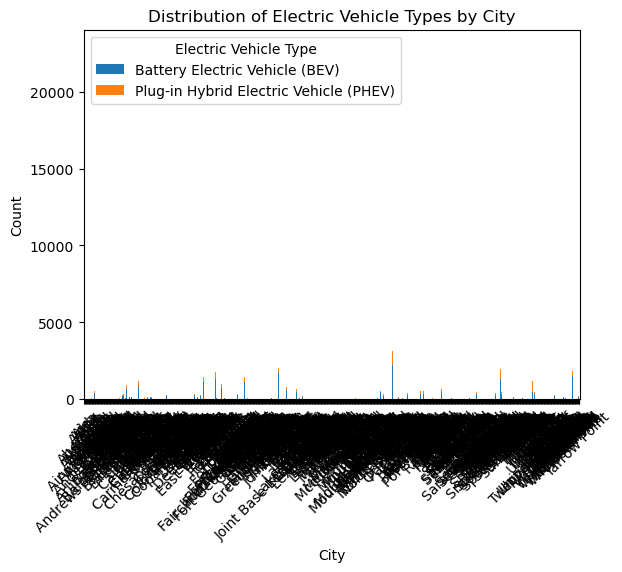

In [5]:
#9.4

import matplotlib.pyplot as plt
#  Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
data.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.show()

# the data is huge and there are 657 different cities